In [ ]:
# https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

In [ ]:
############################################# 1. ################################################### 
# (Import Data)

In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

#Dense,Conv2D,Flatten,MaxPooling2D
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Dropout,GlobalAveragePooling2D,BatchNormalization,Activation
from keras.models import Model,Sequential

In [3]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
############################################# 2. ###################################################
# (Train Test Split / Feature Scaling)

In [ ]:
"""
1. part2-fitting the cnn to the images
"""
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  horizontal_flip = True)

In [ ]:
"""
//////// 3.1 //////// - 48x48
"""
# shuffle=True,seed=42
# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
# Creating training set
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Xccelerate/ML Project/train - diluted',
                          target_size = (48, 48),
                          color_mode="grayscale",
                          batch_size = 32,
                          class_mode = 'categorical')
# Creating the Test set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Xccelerate/ML Project/validation - diluted',
                        target_size = (48, 48),
                        color_mode="grayscale",
                        batch_size = 32,
                        class_mode = 'categorical')

Found 1200 images belonging to 3 classes.
Found 480 images belonging to 3 classes.


In [ ]:
############################################# CNN ###################################################
############################################# CNN ###################################################
############################################# CNN ###################################################

In [ ]:
"""
# 1.3 - simple CNN
"""

from tensorflow.keras.optimizers import Adam,SGD,RMSprop
"""
# input image dimensions - 48x48
"""
img_rows, img_cols = 48, 48
input_shape = (img_rows, img_cols, 1)
"""
# number of classes, batch size, epochs, call classifier
"""
num_classes = 3
batch_size = 50
epochs = 200
classifier=Sequential()
"""
# setup CNN framework
"""
# 1st CNN layer - 64
classifier.add(Convolution2D(128,kernel_size=(3,3),input_shape=input_shape))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.3))

# 2nd CNN layer -128
classifier.add(Convolution2D(128,kernel_size=(3,3),input_shape=input_shape))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.3))

# 3rd CNN layer - 256
classifier.add(Convolution2D(256,kernel_size=(3,3),input_shape=input_shape))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
#classifier.add(Dropout(0.3))


# Flatten
classifier.add(Flatten())

# Fully connected 1st layer - 256
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 2nd layer - 512
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 3rd layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 4rd layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 5rd layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 6th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 7th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 8th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 9th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 10th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 11th layer - 1024
classifier.add(Dense(256))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

# Fully connected 12th layer - 1024
classifier.add(Dense(1024))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
#classifier.add(Dropout(0.3))

classifier.add(Dense(num_classes, activation='softmax'))

In [ ]:
"""
RMSProp + learning rate
"""
from tensorflow import keras
classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              metrics=['accuracy'])
# learning rate
# RMSProp

"""
IF YOU HAVE TAKEN ONE-HOT ENCODING ON YOUR VECTOR ARRAYS, HAVE TO TAKE CATEGORICAL CROSSENTROPY HERE,
IF YOU HAVEN'T, THEN CAN TAKE SPARSE CATEGORICAL CROSSENTROPY
"""

"\nIF YOU HAVE TAKEN ONE-HOT ENCODING ON YOUR VECTOR ARRAYS, HAVE TO TAKE CATEGORICAL CROSSENTROPY HERE,\nIF YOU HAVEN'T, THEN CAN TAKE SPARSE CATEGORICAL CROSSENTROPY\n"

In [ ]:
hist = classifier.fit(training_set,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_set))

classifier.summary()
#classifier.fit_generator(training_set,samples_per_epoch=8000,nb_epoch=25,validation_data=test_set,nb_val_samples=2000)

Epoch 1/200
38/38 [==============================] - 266s 7s/step - loss: 1.2550 - accuracy: 0.3358 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 2/200
38/38 [==============================] - 30s 774ms/step - loss: 1.1871 - accuracy: 0.3542 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 3/200
38/38 [==============================] - 29s 775ms/step - loss: 1.1363 - accuracy: 0.4008 - val_loss: 1.1009 - val_accuracy: 0.3604
Epoch 4/200
38/38 [==============================] - 30s 791ms/step - loss: 1.2026 - accuracy: 0.3483 - val_loss: 1.1063 - val_accuracy: 0.3292
Epoch 5/200
38/38 [==============================] - 29s 774ms/step - loss: 1.1591 - accuracy: 0.3742 - val_loss: 1.1016 - val_accuracy: 0.3542
Epoch 6/200
38/38 [==============================] - 30s 777ms/step - loss: 1.1739 - accuracy: 0.3575 - val_loss: 1.1310 - val_accuracy: 0.3271
Epoch 7/200
38/38 [==============================] - 31s 830ms/step - loss: 1.1474 - accuracy: 0.3858 - val_loss: 1.1638 - val_accuracy: 0

In [ ]:
############################################# 7.5 ###################################################

In [ ]:
hist.history

{'accuracy': [0.335833340883255,
  0.3541666567325592,
  0.4008333384990692,
  0.34833332896232605,
  0.37416666746139526,
  0.35749998688697815,
  0.3858333230018616,
  0.37416666746139526,
  0.3799999952316284,
  0.3841666579246521,
  0.3858333230018616,
  0.3916666805744171,
  0.4050000011920929,
  0.39666667580604553,
  0.38749998807907104,
  0.4008333384990692,
  0.38999998569488525,
  0.4216666519641876,
  0.3816666603088379,
  0.41083332896232605,
  0.4091666638851166,
  0.41583332419395447,
  0.42500001192092896,
  0.43166667222976685,
  0.4208333194255829,
  0.4300000071525574,
  0.45500001311302185,
  0.43666666746139526,
  0.44083333015441895,
  0.4566666781902313,
  0.4466666579246521,
  0.4416666626930237,
  0.4449999928474426,
  0.44083333015441895,
  0.4558333456516266,
  0.46416667103767395,
  0.4675000011920929,
  0.4808333218097687,
  0.4625000059604645,
  0.4925000071525574,
  0.4749999940395355,
  0.48750001192092896,
  0.49416667222976685,
  0.5141666531562805,
  0

Test loss: 2.1486353874206543
Test accuracy: 0.6000000238418579


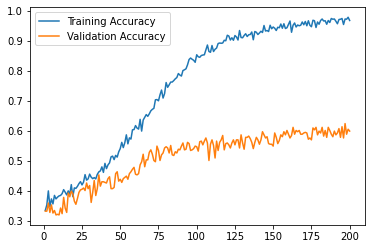

In [ ]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = classifier.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

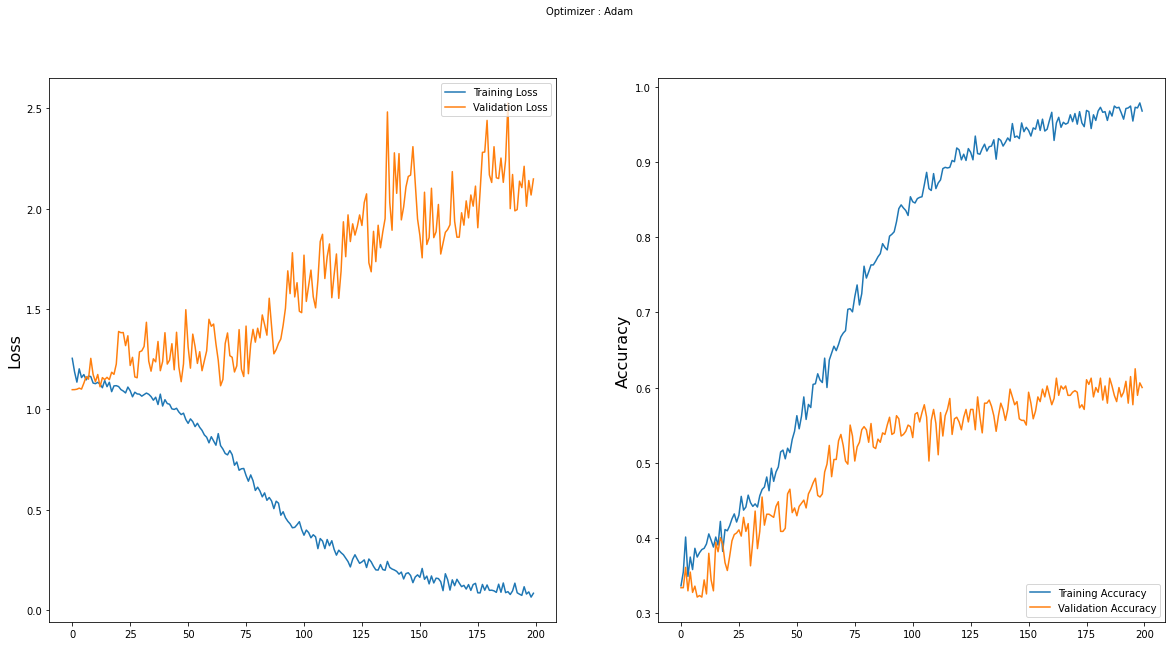

In [ ]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save neural network structure
from pathlib import Path
classifier_structure = classifier.to_json()
f = Path("cnn_emotion_model_structure.json")
f.write_text(classifier_structure)

# Save neural network's trained weights
classifier.save_weights("/content/drive/MyDrive/Xccelerate/ML Project/200_model_weights.h5")
classifier.save("/content/drive/MyDrive/Xccelerate/ML Project/200_assets")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Xccelerate/ML Project/200_assets/assets


In [ ]:
# saving and loading the .h5 model

# save model
classifier.save('/content/drive/MyDrive/Xccelerate/ML Project/200_cnn_3features.h5')

In [4]:
from tensorflow import keras
# load model
savedModel=keras.models.load_model('/content/drive/MyDrive/Xccelerate/ML Project/200_cnn_3features.h5')
savedModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 128)      512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       147584    
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 128)      5

In [ ]:
############################################# 7.5 ###################################################

In [ ]:
############################################# 7.5 ###################################################

In [5]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(r'/content/drive/MyDrive/Xccelerate/ML Project/haarcascade_frontalface_default.xml')
classifier =load_model(r'/content/drive/MyDrive/Xccelerate/ML Project/200_cnn_3features.h5')

emotion_labels = ['Angry','Happy','Neutral']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: ignored

In [ ]:
############################################# 7.5 ###################################################

In [28]:
imagepath = '/content/drive/MyDrive/Xccelerate/ML Project/35821.jpg'

predict = image.load_img(imagepath,color_mode="grayscale",target_size = (48, 48))   
predict_modified = image.img_to_array(predict)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = classifier.predict(predict_modified)
print(result*100)

[[79.83376     0.22287248 19.94336   ]]


In [32]:
if result[0][0]> result[0][1] or result[0][2]:
  final_answer = 'angry'
  probability = result[0][0]
  print("probability =" + str(probability*100))
elif result[0][1]> result[0][0] or result[0][2]:
  final_answer = 'happy'
  probability = result[0][0]
  print("probability =" + str(probability*100))
elif result[0][2]> result[0][0] or result[0][1]:
  final_answer = 'neutral'
  probability = result[0][0]
  print("probability =" + str(probability*100))  

probability =79.83376383781433


In [34]:
imagepath = '/content/drive/MyDrive/Xccelerate/ML Project/81683870_164448044867076_3673071002714645532_n (4).jpg'

predict_2 = image.load_img(imagepath,color_mode="grayscale",target_size = (48, 48))   
predict_modified_2 = image.img_to_array(predict_2)
predict_modified_2 = predict_modified_2 / 255
predict_modified_2 = np.expand_dims(predict_modified_2, axis = 0)
result_2 = classifier.predict(predict_modified_2)
print(result_2*100)
if result_2[0][0]> result_2[0][1] or result_2[0][2]:
  final_answer = 'angry'
  probability = result_2[0][0]
  print("probability =" + str(probability*100))
elif result_2[0][1]> result_2[0][0] or result_2[0][2]:
  final_answer = 'happy'
  probability = result_2[0][0]
  print("probability =" + str(probability*100))
elif result_2[0][2]> result_2[0][0] or result_2[0][1]:
  final_answer = 'neutral'
  probability = result_2[0][0]
  print("probability =" + str(probability*100))  

[[1.9525293e-02 9.9980476e+01 5.9131969e-13]]
probability =0.019525294192135334


In [ ]:
############################################# 7.5 ###################################################

In [ ]:
"""
6.
"""
#to predict new images 
def predict_image(imagepath, classifier):
    predict = image.load_img(imagepath, target_size = (64, 64))   
    predict_modified = image.img_to_array(predict)
    predict_modified = predict_modified / 255
    predict_modified = np.expand_dims(predict_modified, axis = 0)
    result = classifier.predict(predict_modified)
    if result[0][0] >= 0.5:
        prediction = 'dog'
        probability = result[0][0]
        print ("probability = " + str(probability))
    else:
        prediction = 'cat'
        probability = 1 - result[0][0]
        print ("probability = " + str(probability))
        print("Prediction = " + prediction)

In [ ]:
"""
"""

"""
"""

#########################################################################################################################